# Ulvi Bajarani
## SID: 20539914

#### Question 1

#### Given two histograms of color, calculate the minimum intersection metric given by the following formula (metric). Use NumPy to create two test histograms of size 10, populate them with random integer data from 10-100, then calculate the distance.

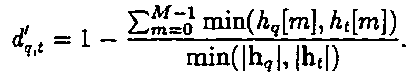

In [ ]:
import numpy as np
import cv2

In [ ]:
image_1 = np.random.randint(low=10, high=100, size=(64, 64, 3))
image_2 = np.random.randint(low=10, high=100, size=(64, 64, 3))

In [ ]:
for i in range(len(image_1)):
    for j in range(len(image_1[0])):
        image_1[i][j][0] = np.floor_divide(image_1[i][j][0], 10)
        image_1[i][j][1] = np.floor_divide(image_1[i][j][1], 20)
        image_1[i][j][2] = np.floor_divide(image_1[i][j][2], 25)
        
for i in range(len(image_2)):
    for j in range(len(image_2[0])):
        image_2[i][j][0] = np.floor_divide(image_2[i][j][0], 10)
        image_2[i][j][1] = np.floor_divide(image_2[i][j][1], 20)
        image_2[i][j][2] = np.floor_divide(image_2[i][j][2], 25)

In [ ]:
image_1_1d_array = np.zeros(10)

for i in range(len(image_1)):
    for j in range(len(image_1[0])):
        image_1_1d_array[image_1[i][j][0]] += 1
        image_1_1d_array[image_1[i][j][1]] += 1
        image_1_1d_array[image_1[i][j][2]] += 1

image_2_1d_array = np.zeros(10)

for i in range(len(image_2)):
    for j in range(len(image_2[0])):
        image_2_1d_array[image_2[i][j][0]] += 1
        image_2_1d_array[image_2[i][j][1]] += 1
        image_2_1d_array[image_2[i][j][2]] += 1

In [ ]:
numerator = 0

for i in range(0, len(image_1_1d_array)):
    numerator += np.minimum(image_1_1d_array[i], image_2_1d_array[i])
    
denominator = np.minimum(np.sum(image_1_1d_array),np.sum(image_2_1d_array))

In [ ]:
distance = 1-(numerator/denominator)
print("Distance is: " + str(distance))

#### 2. Find an image of a cigarette box on the internet, create and show the HOG features for that image using skimage packages. You can use “from skimage import feature” to calculate the hog feature.
##### a. Your notebook will read the image, show the original image, calculate the hog, then show the hog image. The output should look similar to the following image.




In [66]:
import matplotlib.pyplot as plt
import cv2
import sys
from skimage.feature import hog

image = cv2.imread("cigarettebox.jpg")
cv2.imshow('Original Image', image)
cv2.waitKey(0)

fd, hog_image = hog(image, visualize=True, multichannel=True)

cv2.imshow('HOG of Image', hog_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 3. Capture live video and show an object with red in it (a red pen, even your hand and skin will do). Use the HSV color space to highlight the area with redness (using a bit-wise mask), if present.
##### a. Check the color as feature slides, and particularly the python code that detects the blue caps. You should understand the code there, then adjust it to detect the blood.

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(True):
    _, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0,120,70])
    upper_red1 = np.array([10,255,255])

    bitwise_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

    lower_red2 = np.array([170,120,70])
    upper_red2 = np.array([180,255,255])

    bitwise_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    bitwise_mask = bitwise_mask1 + bitwise_mask2

    result = cv2.bitwise_and(frame, frame, mask=bitwise_mask)
    cv2.imshow('Original Image',frame)
    cv2.imshow('Bitwise Mask', bitwise_mask)
    cv2.imshow('Result of Detection', result)

    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cv2.destroyAllWindows()

cap.release()